-------------------------------------------------------------------------------------------------------------------
Tim Ellis & Israel Lopez\
Cal State LA - CS4661\

-------------------------------------------------------------------------------------------------------------------
## Table of Contents
-------------------------------------------------------------------------------------------------------------------

+ 1. **Introduction** - Tim Ellis
+ 2. **Setup** - Israel Lopez
+ 3. **KNN** - Tim Ellis
    - A. Get knn accuracy for each individual feature
    - B. KNN with different K values
    - C. Decision Tree with bagging/voting
    - D. KNN with 2-feature combination
    - E. KNN single feature with best performing K
    - F. Make final evaluation
+ 4. **Decision Tree** - Israel Lopez
    - A. General case Decision Tree without random_state
    - B. Decision Tree with random_state
    - C. Decision Tree with bagging/voting
    - D. Results

+ 5. **Linear Regression** - Israel Lopez
    - A. Linear regression testing
    - B. MSE and RMSE
    - C. Results and visualization
+ 6. **Logistic Regression** - Tim Ellis
    - A. General case logistic regression
    - B. Logistic regression with cross validation
    - C. Logistic regression probabilities
    - D. Compute AUC and Plot ROC Curve
+ 7. **Random Forest** - Israel Lopez
+ 8. **KMeans Clustering** - Tim Ellis
    - A. Kmeans Testing Pt. 1
    - B. Kmeans Testing Pt. 2
    - C. Kmeans Combined Testing and Results
+ 9. **Conclusion** - Israel Lopez
+ 10. **Resources** - Tim Ellis

-------------------------------------------------------------------------------------------------------------------
## 1.) Introduction
-------------------------------------------------------------------------------------------------------------------

The Spotify Song Popularity Predictor, or SSPP, is a data science project intended to find the best model for predicting song popularity on the Spotify platform, based on a set of features: acousticness, danceability, energy, instrumentalness, liveness, speechiness, valence. The project imports the Spotify dataset, courtesty of Kaggle (https://www.kaggle.com/yamaerenay/spotify-dataset-19212020-160k-tracks), and then creates a feature matrix and label vector that can be used with the knn, decision tree, linear regression, logistic regression, random forest, and kmeans clustering algorithms to find a model that produces the most accurate popularity prediction. With this model, a useful application can be created for musicians, A&R agents, managers, and members of the music industry to measure a songs liklihood, or not, of becoming popular on the Spotify platform, one of the most popular music streaming platforms on the market.

-------------------------------------------------------------------------------------------------------------------
## 2.) Setup
-------------------------------------------------------------------------------------------------------------------

#### Imports
- First we will import the libraries we will need for the project. This block of code will house these imports

In [212]:
# imports

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn import preprocessing
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier


- Now we will create the Pandas Dataframe and read from the csv data

#### DATA.CSV

- First we will import the primary data csv file into a pandas dataframe. 
- Then we will limit the data frame to years begining in 2012 and ending in 2019. We start this in 2012 because that is when spotify created these features, otherwise there may not be feature values for older dates, also what was popular in the 90s, 80s, or even the 1960's will not necessarily be popular today. 
- Additionally, we limit the max year to 2019, because we may want to test the algorithm on songs from 2020 to see how accurate our predictions are. 
- Finally we print the first 5 rows of the data to make sure we are getting values.

In [229]:
# create pandas dataframe from the csv file
data = pd.DataFrame()
data = pd.read_csv("../CSV Data Sets/data.csv")

# limit the dataframe to years 2012 - 2019
data = data[data.year.between(2012, 2019)]

# print the first 5 rows
data.head()

,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year
7254,0.209000,['Lana Del Rey'],0.180,286253,0.636,0,3eRZZ4d2RJSqFKzP7tSdFE,0.000133,4,0.217,-6.591,0,Born To Die,49,2012-01-30,0.0438,75.632,0.390,2012
7255,0.038500,['Lindsey Stirling'],0.423,247422,0.746,0,5Q5sQ1AgLQ1wKKXIYt6FGC,0.000013,0,0.210,-6.912,1,Elements,49,2012,0.0582,139.804,0.214,2012
7256,0.059100,['The Avett Brothers'],0.512,255013,0.465,0,6B6C1OC9RUvrvBECPWtAZo,0.000031,4,0.112,-7.144,1,February Seven,48,2012-01-01,0.0253,137.892,0.267,2012
7257,0.017800,"['Nicki Minaj', 'Chris Brown']",0.569,265333,0.858,1,2bgW1SJqUjIkWcbxTPTIdy,0.000000,1,0.127,-4.847,1,Right By My Side,55,2012-01-01,0.2680,161.921,0.495,2012
7258,0.000088,"['deadmau5', 'Gerard Way']",0.730,243750,0.511,0,2AqazcPtVXn7uhFIyInNNp,0.273000,1,0.247,-5.198,1,Professional Griefers - Vocal Mix,51,2012-09-25,0.0712,128.025,0.644,2012


- Now we will create a new column, "binary_popularity" that will contain the values 1 if popular, 0 if not. We will define our "true" popularity as being > 50, and our "false" popularity <= 50. This will be used as our label

In [230]:
# create a new column "binary_popularity" containing 1 for popularity values > 50, else it will be set to 0
data['binary_popularity'] = np.where(data['popularity'] > 50, 1, 0)

# print first 5 rows
data.head()

,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year,binary_popularity
7254,0.209000,['Lana Del Rey'],0.180,286253,0.636,0,3eRZZ4d2RJSqFKzP7tSdFE,0.000133,4,0.217,-6.591,0,Born To Die,49,2012-01-30,0.0438,75.632,0.390,2012,0
7255,0.038500,['Lindsey Stirling'],0.423,247422,0.746,0,5Q5sQ1AgLQ1wKKXIYt6FGC,0.000013,0,0.210,-6.912,1,Elements,49,2012,0.0582,139.804,0.214,2012,0
7256,0.059100,['The Avett Brothers'],0.512,255013,0.465,0,6B6C1OC9RUvrvBECPWtAZo,0.000031,4,0.112,-7.144,1,February Seven,48,2012-01-01,0.0253,137.892,0.267,2012,0
7257,0.017800,"['Nicki Minaj', 'Chris Brown']",0.569,265333,0.858,1,2bgW1SJqUjIkWcbxTPTIdy,0.000000,1,0.127,-4.847,1,Right By My Side,55,2012-01-01,0.2680,161.921,0.495,2012,1
7258,0.000088,"['deadmau5', 'Gerard Way']",0.730,243750,0.511,0,2AqazcPtVXn7uhFIyInNNp,0.273000,1,0.247,-5.198,1,Professional Griefers - Vocal Mix,51,2012-09-25,0.0712,128.025,0.644,2012,1


- We can see that our binary-popularity column is working properly, now we can move onto some classification methods

-------------------------------------------------------------------------------------------------------------------
## 3.) KNN
-------------------------------------------------------------------------------------------------------------------

#### A.) Get knn accuracy for each individual feature

- First we'll create the feature list

In [231]:
# create a list of features from the dataset:
features = ['acousticness', 'danceability', 'energy', 'instrumentalness', 'liveness', 'speechiness', 'valence']

- Now we'll iterate through each feature, while separating the testing and training data, scaling the data, using KNN with k = 5, and print the acuracy scores for each prediction.

In [232]:
# create three empty lists, 1 will hold the accuracy scores, the other two will be used for creatinga graph
scores= []
fNames = []
values = []

# check knn for every feature in our features list to see which performs best
for feature in features:
    
    # create the feature matrix
    X = data[[feature]]
    
    # scale the feature matrix
    X_scaled = preprocessing.scale(X)
    
    #create the label vector
    y = data['binary_popularity']
    
    # split our testing and training values using test-size 25% and random state 6
    X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.25, random_state=6)
    
    # use sklearn's KNN class with k = 5
    knn = KNeighborsClassifier(n_neighbors=5)
    
    # run the KNN algorithm on our training data
    knn.fit(X_train, y_train)
    
    # run our prediction based on our KNN algorithm
    y_predict = knn.predict(X_test)
    
    # check the accuracy of our prediction
    accuracy = accuracy_score(y_test, y_predict)
    
    #append to our scores list the feature used and its accuracy
    scores.append([feature, accuracy])
    
    # append the accuracy and feature to our 2 other lists that we can use for our graph
    values.append(accuracy)
    fNames.append(feature)
    
# print the scores to evaluate
print(scores)

[['acousticness', 0.8865408805031446], ['danceability', 0.8757232704402516], ['energy', 0.8827672955974842], ['instrumentalness', 0.8923270440251573], ['liveness', 0.8877987421383647], ['speechiness', 0.8885534591194969], ['valence', 0.8852830188679245]]


- We can plot the data to visually compare the accuracy scores

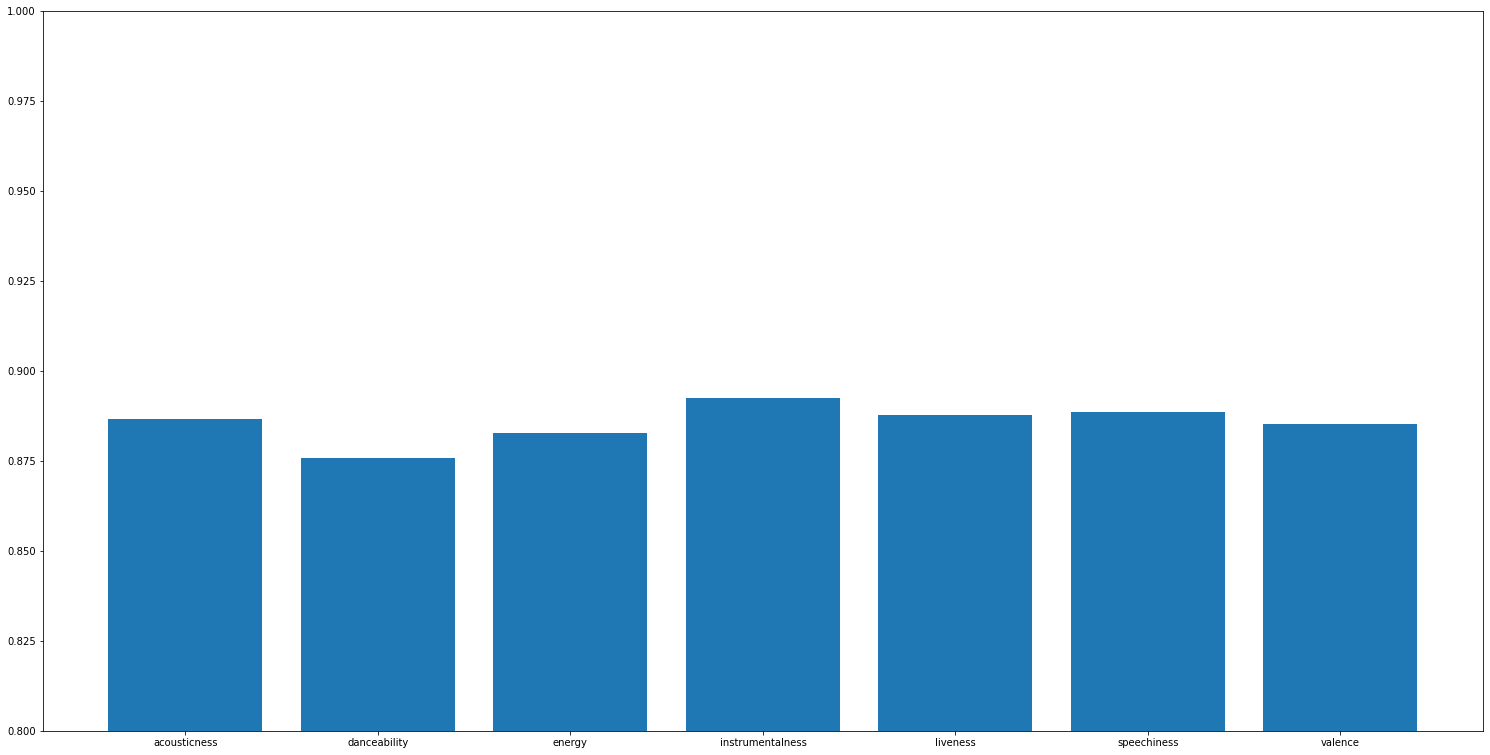

In [233]:
# keep the figures inside the explorer page 
%matplotlib inline

# set the height and width of the graph
fig = plt.figure(figsize=(20, 10))

# add the axises and set the limit to between .8 and .85
ax = fig.add_axes([0,0,1,1])
ax.set_ylim(0.8, 1)

# set the y and x axis with the lists created above
ax.bar(fNames,values)

# print the graph
plt.show()

- So far it looks like instrumentalness will be a key feature in our classifiers. Of course this makes sense, how many popular songs are instrumental?

#### B.) KNN with different K values

- Now we'd like to try different K values to see if accuracy can be improved. 
- We can also test the different k values on each feature, to see if a k-value with a specific feature is better/worse

In [234]:
# create a list of different k values to see how our accuracy changes
ks = [1, 5, 7, 11, 15, 27, 59]

# go through each feature again, but this time test different k values for each feature
# see comments above for full explanation of methods
for feature in features:
    X = data[[feature]]
    X_scaled = preprocessing.scale(X)
    y = data['binary_popularity']
    X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.25, random_state=6)
    
    # here is where we will iterate thorough each k value (in our k list) with each feature
    for k in ks: 
        knn = KNeighborsClassifier(n_neighbors=k) 
        knn.fit(X_train, y_train)
        y_predict = knn.predict(X_test)
        accuracy = accuracy_score(y_test, y_predict)
        print(f"{feature} k={k} - {accuracy} accuracy")

acousticness k=1 - 0.8155974842767295 accuracy
acousticness k=5 - 0.8865408805031446 accuracy
acousticness k=7 - 0.8918238993710692 accuracy
acousticness k=11 - 0.8940880503144654 accuracy
acousticness k=15 - 0.8943396226415095 accuracy
acousticness k=27 - 0.8943396226415095 accuracy
acousticness k=59 - 0.8943396226415095 accuracy
danceability k=1 - 0.8148427672955975 accuracy
danceability k=5 - 0.8757232704402516 accuracy
danceability k=7 - 0.8905660377358491 accuracy
danceability k=11 - 0.8943396226415095 accuracy
danceability k=15 - 0.8943396226415095 accuracy
danceability k=27 - 0.8943396226415095 accuracy
danceability k=59 - 0.8943396226415095 accuracy
energy k=1 - 0.7987421383647799 accuracy
energy k=5 - 0.8827672955974842 accuracy
energy k=7 - 0.8880503144654088 accuracy
energy k=11 - 0.8943396226415095 accuracy
energy k=15 - 0.8943396226415095 accuracy
energy k=27 - 0.8943396226415095 accuracy
energy k=59 - 0.8943396226415095 accuracy
instrumentalness k=1 - 0.8465408805031447 a

#### C.) KNN with entire feature matrix

- From the above results we can see that our best performing k values for each feature are around 11. 
- Now we will test the entire features matrix with k values between 10 and 20 to find our final k value we will use

In [235]:
# see comments above for full explanation of methods
X = data[features]
X_scaled = preprocessing.scale(X)
y = data['binary_popularity']
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.25, random_state=6)

# our K's to test, between 10 and 20
ks = [10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]

# run the fitting again and get accuracies
for k in ks: 
    knn = KNeighborsClassifier(n_neighbors=k) 
    knn.fit(X_train, y_train)
    y_predict = knn.predict(X_test)
    accuracy = accuracy_score(y_test, y_predict)
    print(f"k={k} - {accuracy} accuracy")



k=10 - 0.890062893081761 accuracy
k=11 - 0.8928301886792452 accuracy
k=12 - 0.8925786163522013 accuracy
k=13 - 0.8940880503144654 accuracy
k=14 - 0.8935849056603774 accuracy
k=15 - 0.8938364779874214 accuracy
k=16 - 0.8938364779874214 accuracy
k=17 - 0.8943396226415095 accuracy
k=18 - 0.8943396226415095 accuracy
k=19 - 0.8943396226415095 accuracy
k=20 - 0.8943396226415095 accuracy


- Here we can see that after k = 17, our prediction doesn't get better so we will let k = 17. 
- Now we will use cross validation (10 fold), to see if we can improve our accuracy. 
- We then print a list to evaluate.

In [236]:
# set k to 17
knn = KNeighborsClassifier(n_neighbors=17)

# use 10-fold cross evaluation and print a list of our accuracy scores
accuracy_list = cross_val_score(knn, X_scaled, y, cv=10, scoring='accuracy')
print(accuracy_list)

[0.89371069 0.89371069 0.89371069 0.89371069 0.89371069 0.89371069
 0.89371069 0.89371069 0.89371069 0.89371069]


- Now we will get the average of the accuracy list to find a final accuracy number

In [237]:
# use average of accuracy values as final result
accuracy_cv = accuracy_list.mean()

# print final result
print(accuracy_cv)

0.8937106918238994


#### D.) KNN with 2-feature combination

- Our cross evaluation gives us slightly less accuracy than running our regular KNN algorithm with the entire feature matrix with k = 17. 
- Now we will try to see if a 2-feature combination can perform better than a single feature or an entire feature matrix

In [238]:
# see code comments above for detailed descriptions of these lists
scores=[]
fNames = []
values = []

# the difference here is we use 2 for loops to try every combination of 2 features from our feature list
#  we keep our 2 additional lists so we can again make a graph for evaluation.
for i in features:
    for j in features:
        if not i == j:
            X = data[[i, j]]
            X_scaled = preprocessing.scale(X)
            y = data['binary_popularity']
            X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.25, random_state=6)
            k = 17
            knn = KNeighborsClassifier(n_neighbors=k)
            knn.fit(X_train, y_train)
            y_predict = knn.predict(X_test)
            accuracy = accuracy_score(y_test, y_predict)
            scores.append([i, j, accuracy])
            values.append(accuracy)
            group = i + ' & ' +j
            fNames.append(group)

print(scores)

[['acousticness', 'danceability', 0.8943396226415095], ['acousticness', 'energy', 0.8940880503144654], ['acousticness', 'instrumentalness', 0.8943396226415095], ['acousticness', 'liveness', 0.8943396226415095], ['acousticness', 'speechiness', 0.8940880503144654], ['acousticness', 'valence', 0.8943396226415095], ['danceability', 'acousticness', 0.8943396226415095], ['danceability', 'energy', 0.8930817610062893], ['danceability', 'instrumentalness', 0.8943396226415095], ['danceability', 'liveness', 0.8943396226415095], ['danceability', 'speechiness', 0.8935849056603774], ['danceability', 'valence', 0.8940880503144654], ['energy', 'acousticness', 0.8940880503144654], ['energy', 'danceability', 0.8930817610062893], ['energy', 'instrumentalness', 0.8940880503144654], ['energy', 'liveness', 0.8940880503144654], ['energy', 'speechiness', 0.8938364779874214], ['energy', 'valence', 0.8943396226415095], ['instrumentalness', 'acousticness', 0.8943396226415095], ['instrumentalness', 'danceability'

- Now we can again graph the data to visualize it.

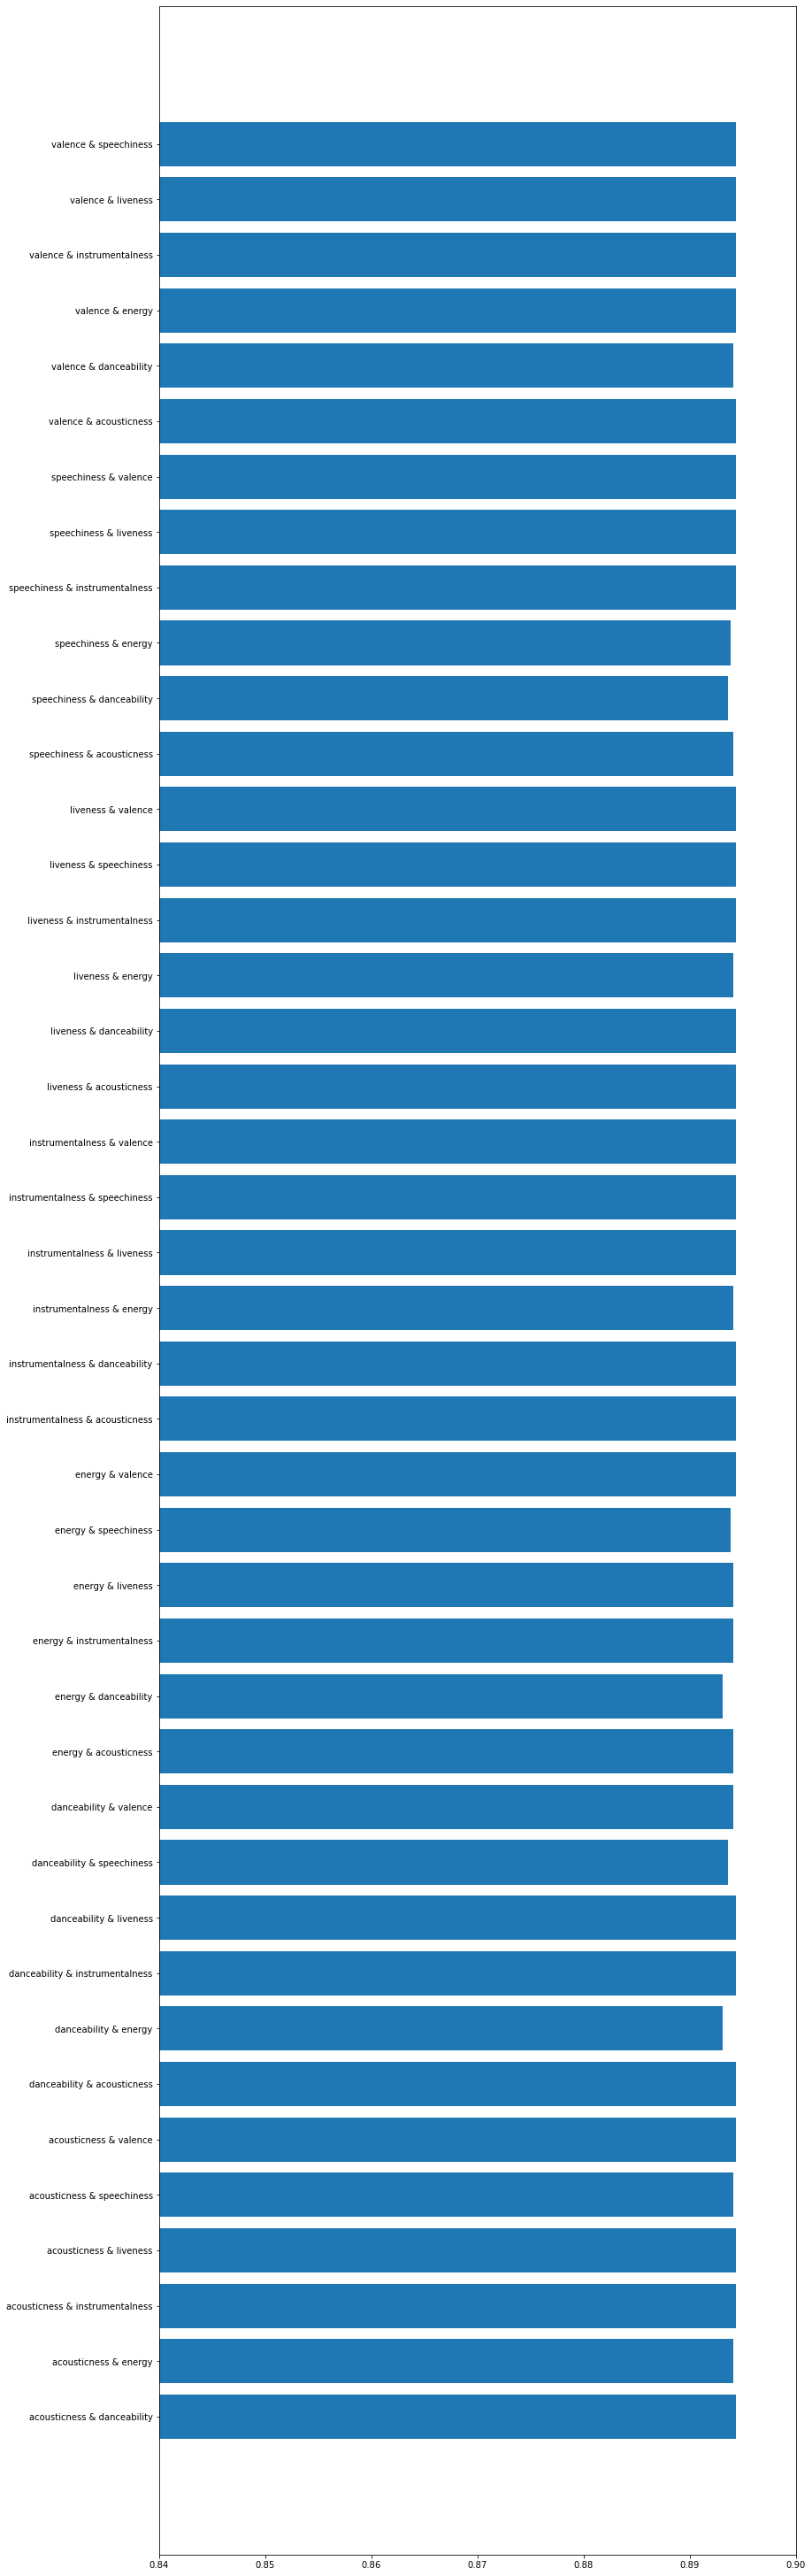

In [239]:
# keep the figures inside the explorer page 
%matplotlib inline

# see comments from previous graph. Here, however, we use barh = horizontal graph
fig = plt.figure(figsize=(10, 40))
ax = fig.add_axes([0,0,1,1])
ax.set_xlim(0.84, 0.9)

# here is where we make the graph horizontal
ax.barh(fNames,values)
plt.show()

- Here we see our best accuracy score for the pairs, matches our score for the entrire feature matrix, so we can keep our feature matrix in full

#### E.) KNN single feature with best performing K

- We still can try each individual feature with k = 17 and 10 fold cross-valudation and see if we can improve accuracy.

In [240]:
# see code comments above for full commenting, here we try each individual feature 
# with k= 14 and 10-fold cross validation to see if we can improve our accuracy
for feature in features:
    X = data[[feature]]
    X_scaled = preprocessing.scale(X)
    y = data['binary_popularity']
    X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.25, random_state=6)
    knn = KNeighborsClassifier(n_neighbors=17) 
    knn.fit(X_train, y_train)
    y_predict = knn.predict(X_test)
    accuracy_list = cross_val_score(knn, X_scaled, y, cv=10, scoring='accuracy')
    accuracy_cv = accuracy_list.mean()
    print(f"feature: {feature}, accuracy: {accuracy_cv}")

feature: acousticness, accuracy: 0.8937106918238994
feature: danceability, accuracy: 0.8937106918238994
feature: energy, accuracy: 0.8930817610062893
feature: instrumentalness, accuracy: 0.8936477987421385
feature: liveness, accuracy: 0.8937106918238994
feature: speechiness, accuracy: 0.8937106918238994
feature: valence, accuracy: 0.8937106918238994


#### F.) Make final evaluation

- It looks like the best accuracy score we can get is KNN with the full feature matrix and k = 17, This accuracy score is 89.43%

-------------------------------------------------------------------------------------------------------------------
## 4.) Decision Tree
-------------------------------------------------------------------------------------------------------------------

- First we create the feature matrix and label vector
- Then we create our training data

In [241]:
features = ['acousticness', 'danceability', 'energy', 'instrumentalness', 'liveness', 'speechiness', 'valence']
X = data[features]
X_scaled = preprocessing.scale(X)
y = data['binary_popularity']
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.25, random_state=6)

#### A.) General case Decision Tree without random_state

In [242]:
DT = DecisionTreeClassifier()

In [243]:
DT.fit(X_train, y_train)

DecisionTreeClassifier()

In [244]:
# Testing on the testing set:

y_predict = DT.predict(X_test)

print(y_predict)

[1 1 1 ... 1 1 1]


In [245]:
print(accuracy_score(y_test, y_predict))

0.8077987421383648


- When using a general Decision tree without random state our accuracy is about 80%

#### B.) Decision Tree with random_state

In [246]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.25, random_state=6)
DT = DecisionTreeClassifier(random_state=10)

In [247]:
DT.fit(X_train, y_train)


DecisionTreeClassifier(random_state=10)

In [248]:
y_predict = DT.predict(X_test)


In [249]:
print(accuracy_score(y_test, y_predict))

0.8075471698113208


- When using a general Decision tree with random state = 10 our accuracy is about 80.75%

#### C.) Decision Tree with bagging/voting

In [250]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.25, random_state=6)

# Set hyper-parameters, for controlling algorithm
clf = DecisionTreeClassifier(max_depth=2)

# Learn a model from training data
clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2)

In [251]:
y_predict = clf.predict(X_test)
print(y_predict)


[1 1 1 ... 1 1 1]


In [252]:
print(accuracy_score(y_test, y_predict))

0.8943396226415095


- Using a Decision tree with bagging and voting we find that the accuracy is 89.43% with a max_depth of 2. 

- Below we will test max_depth values that range from 1 to 15 to see if there is an increace of accuracy. 

In [253]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.25, random_state=4)

bestaccuracy = -1
bestindex = -1
for i in range(1, 20):
    clf = DecisionTreeClassifier(max_depth = i)
    # Learn a model from training data
    clf.fit(X_train, y_train)
    y_predict = clf.predict(X_test)
    clf.predict_proba(X_test)
    accuracy = accuracy_score(y_test, y_predict)
    print("max_depth = ", i , " accuracy score", accuracy)
    if accuracy >= bestaccuracy:
        bestaccuracy = accuracy 
        bestindex = i
        
print("\n","Best Accuracy: "  , bestaccuracy , "  max_depth = " , bestindex)


max_depth =  1  accuracy score 0.8991194968553459
max_depth =  2  accuracy score 0.8991194968553459
max_depth =  3  accuracy score 0.8983647798742138
max_depth =  4  accuracy score 0.8986163522012579
max_depth =  5  accuracy score 0.8981132075471698
max_depth =  6  accuracy score 0.8961006289308177
max_depth =  7  accuracy score 0.889811320754717
max_depth =  8  accuracy score 0.8870440251572327
max_depth =  9  accuracy score 0.8840251572327044
max_depth =  10  accuracy score 0.8777358490566037
max_depth =  11  accuracy score 0.8749685534591195
max_depth =  12  accuracy score 0.8636477987421384
max_depth =  13  accuracy score 0.86062893081761
max_depth =  14  accuracy score 0.8548427672955975
max_depth =  15  accuracy score 0.8470440251572326
max_depth =  16  accuracy score 0.840754716981132
max_depth =  17  accuracy score 0.8372327044025157
max_depth =  18  accuracy score 0.8261635220125786
max_depth =  19  accuracy score 0.8238993710691824

 Best Accuracy:  0.8991194968553459   max_d

#### D.) Results

- After having a max_depth of range 1 to 15 we see that the best accuracy is when we have an initial random_state of 4 for the training data and a max_depth of 2 producing us an accuracy of 89.91% When comparing this to the previous accuracy we decided that if will be using a random state of 4 when splitting the data and a max_depth of 2 when applying decision trees to our model. When comparing both of theses bagging and voting methods to the original decision tree model we see that the accuracy increases almost 9%.

-------------------------------------------------------------------------------------------------------------------
## 5.) Linear Regression
-------------------------------------------------------------------------------------------------------------------

#### A.) Linear Regression Testing

In [254]:
features = ['acousticness', 'danceability', 'energy', 'instrumentalness', 'liveness', 'speechiness', 'valence']
X = data[features]
X_scaled = preprocessing.scale(X)
y = data['popularity']
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.25, random_state=6)

In [255]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(11925, 7)
(11925,)
(3975, 7)
(3975,)


- Here "my_linreg" is instantiated as an "object" of LinearRegression "class" and we run "fit". 

In [256]:
# In the following line, "my_linreg" is instantiated as an "object" of LinearRegression "class". 
my_linreg = LinearRegression()

# fitting the model to the training data:
my_linreg.fit(X_train, y_train)

LinearRegression()

In [257]:
# printing Theta0 using attribute "intercept_":
print(my_linreg.intercept_)

# printing [Theta1, Theta2, Theta3] using attribute "coef_":
print(my_linreg.coef_)

61.21162364928903
[ 0.11433027  1.61420455 -0.7739777  -0.00276262 -0.07838649  0.06568703
 -0.27870316]


- Here we can see the model will be:<br><br>
$$y = 61.212 + 0.114 \times acousticness + 1.614 \times danceability - 0.774 \times energy - 0.003 \times instrumentalness - 0.078 \times liveness + 0.066 \times speechiness -0.279 \times valence$$
<br>
- This means that danceability will be the most important feature for this model, because it is the largest number
- Instrumentalness will be the least important feature because it is the smallest

In [258]:
# make predictions on the testing set
y_prediction = my_linreg.predict(X_test)

In [259]:
y_prediction = np.where(y_prediction > 50, 1, 0)
y_test = np.where(y_test > 50, 1, 0)

In [260]:
score_LinearRegression = accuracy_score(y_prediction , y_test)
print(score_LinearRegression)

0.8943396226415095


#### B.) MSE and RMSE

In [261]:
# Calculating "Mean Square Error" (MSE):
mse = metrics.mean_squared_error(y_test, y_prediction)

# Using numpy sqrt function to take the square root and calculate "Root Mean Square Error" (RMSE)
rmse = np.sqrt(mse)

print(rmse)

0.3250544221488004


#### C.) Results and Visualization

- The accuracy score of our prediction is 89.43% when using Linear regression. Please note that we are using boolean values indicating popular or not popular. If the popularity value falls underneath 50% it is not popular otherwise it is popular. 

- We obtained a "Root Mean Square Error" (RMSE) of 0.3250

Text(69.0, 0.5, 'Truth')

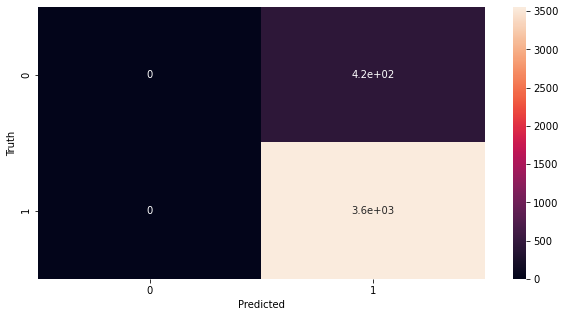

In [262]:
cm = confusion_matrix(y_test, y_prediction)
%matplotlib inline
plt.figure(figsize=(10,5))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

- The above graph shows our prediction vs the truth. Here we see every value we predicted as true. For example we see that we predicted 3.6*10^3 = 3600 values correctly vs only 420 false positives. which is around 88.33%. The numbers in this plot are rounded , but the results is very similar to our accuracy score.

-------------------------------------------------------------------------------------------------------------------
## 6.) Logistic Regression
-------------------------------------------------------------------------------------------------------------------

#### A.) General case logistic regression

- First we will again create our feature matrix and label vector
- We will scale the feature matrix
- And finally, we will create our test/training split

In [263]:
# create feature matrix and scale, and then create label vector
features = ['acousticness', 'danceability', 'energy', 'instrumentalness', 'liveness', 'speechiness', 'valence']
X = data[features]
X_scaled = preprocessing.scale(X)
y = data['binary_popularity']

# test/train split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.25, random_state=6)

- Now we will create the logistic regression object and fit the training data
- Then, we will run the pridiction and print the results

In [264]:
# instantiate the logistic regression object
my_logreg = LogisticRegression()

In [265]:
# fit with training data
my_logreg.fit(X_train, y_train)

LogisticRegression()

In [266]:
#run prediction using test data
y_predict_lr = my_logreg.predict(X_test)

# print results
print(y_predict_lr)

[1 1 1 ... 1 1 1]


- Now we will check the accuracy of the model and pring the score

In [267]:
# get accuracy of prediction vs the testing set
score_lr = accuracy_score(y_test, y_predict_lr)

# print the result
print(score_lr)

0.8943396226415095


#### B.) Logistic regression with cross validation

- Now we will again use logistic regression with our data, but we use 10-fold cross validation to further check the accuracy

In [268]:
# apply 10-fold cross validation

# instantiate logreg as an LogisticRegression object
logreg = LogisticRegression()

# call cross_val_score function to perform cross validation
accuracy_list = cross_val_score(my_logreg, X_scaled, y, cv=10, scoring='accuracy')

print(accuracy_list)

[0.89371069 0.89371069 0.89371069 0.89371069 0.89371069 0.89371069
 0.89371069 0.89371069 0.89371069 0.89371069]


- Here we will print the average of all our accuracy numbers for each of the 10 folds

In [269]:
# use average of accuracy values as final result
accuracy_cv = accuracy_list.mean()

# print final result
print(accuracy_cv)

0.8937106918238994


#### C.) Logistic regression probabilities

- Now we will create a list of probabilities for each result. This will help us visualize the data in a ROC Curve

In [270]:
# run predict_prob to get the probability of each label
y_predict_prob_lr = my_logreg.predict_proba(X_test)

print(y_predict_prob_lr)

[[0.11209236 0.88790764]
 [0.10626946 0.89373054]
 [0.08864114 0.91135886]
 ...
 [0.10204655 0.89795345]
 [0.11698442 0.88301558]
 [0.09767937 0.90232063]]


#### D.) Compute AUC and Plot ROC Curve

- To better visualize the data, we can get our false and true positive rates and plat a ROC curve to check the AUC and better understand our accuracy

In [271]:
# run roc_curve on the labels and get the fpr, tpr, and thresholds
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_predict_prob_lr[:,1], pos_label=1)

# get auc
AUC = metrics.auc(fpr, tpr)
print(AUC)

0.6149069050967786


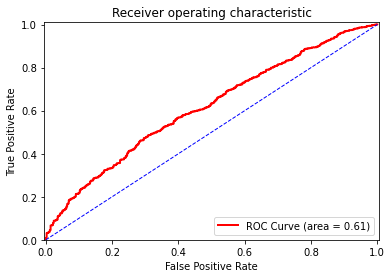

In [272]:
# keep the figure inside the explorer page
%matplotlib inline

# instantiate a plot
plt.figure()

# plot the roc curve with a red line and set the label to 2 decimal places
plt.plot(fpr, tpr, color='red', lw=2, 
         label='ROC Curve (area = %0.2f)' % AUC)

# Random Guess line:
plt.plot([0, 1], [0, 1], color='blue', lw=1, linestyle='--')

# define the x and y axis range
plt.xlim([-0.005, 1.005])
plt.ylim([0.0, 1.01])

# create the labels for the x and y axis, the title, and the legend
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")

# print the plot
plt.show()

- The plot shows the relationship between true and false positives at different decision thresholds. The blue dotted line represents a 50% relationship which is undesirable. Our curve, shown in red, displays our model is better at predicting true postives and especially between the thresholds of .2 and .6.

-------------------------------------------------------------------------------------------------------------------
## 7.) Random Forest
-------------------------------------------------------------------------------------------------------------------

In [273]:
features = ['acousticness', 'danceability', 'energy', 'instrumentalness', 'liveness', 'speechiness', 'valence']
X = data[features]
X_scaled = preprocessing.scale(X)
y = data['binary_popularity']
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.25, random_state=6)

In [274]:
RFC = RandomForestClassifier(n_estimators=100)
RFC.fit(X_train, y_train)

RandomForestClassifier()

In [275]:
y_predicted = RFC.predict(X_test)
    
# check the accuracy of our prediction
accuracy = accuracy_score(y_test, y_predicted)

In [276]:
print(accuracy)
RFC.score(X_test,y_test)

0.8923270440251573


0.8923270440251573

Text(69.0, 0.5, 'Truth')

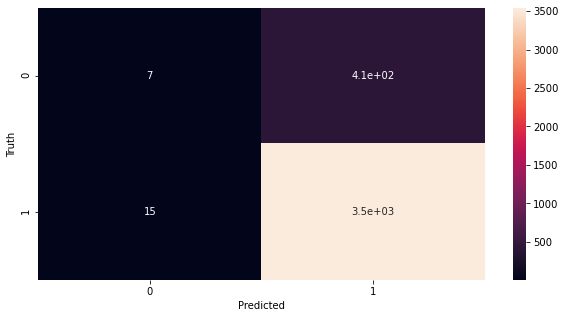

In [277]:
cm = confusion_matrix(y_test, y_predicted)
%matplotlib inline
plt.figure(figsize=(10,5))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

- When Using random forest to predict our model our results are very similar to decision tree with bagging and voting, as expected. We end up with a accuracy score of 0.8923270440251573 or 89.23%.

-------------------------------------------------------------------------------------------------------------------
## 8.) KMeans Clustering
-------------------------------------------------------------------------------------------------------------------

#### A.) Kmeans Testing Pt. 1

- Here we are exploring general patterns among the features, in absense of a label
- First we select 2 features to test first, valence and liveness
- Then we run the KMeans algorithm with the selected features
- Finally we plot the clusturs in a scatter graph, with two different colors representing different clusters, and observe the patterns

<function matplotlib.pyplot.show(*args, **kw)>

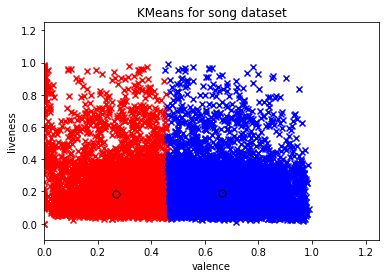

In [278]:
# keep the figures inside the explorer page 
%matplotlib inline

# use 2 features to check the clustering
features1 = ['valence', 'liveness']
X = data[features1]

# set the clustering
my_KMeans = KMeans(n_clusters=2)
my_KMeans.fit(X)

# create the labels from the clustering labels 
labels = my_KMeans.labels_

# find the center of clusters
centers = my_KMeans.cluster_centers_

# plot the results
plt.figure

for l, c in zip([0,1], ['red', 'blue']):
    
    current_members = (labels == l)
    current_center = centers[l]
    
    plt.scatter(X.iloc[current_members,0], X.iloc[current_members,1], color = c, marker='x')
    
    plt.plot(current_center[0], current_center[1], 'o', markerfacecolor = c,
            markeredgecolor = 'k', markersize=7)

# range of axises
plt.xlim([0, 1.25])
plt.ylim([-0.1, 1.25])

# set the label title and legend
plt.xlabel('valence')
plt.ylabel('liveness')
plt.title('KMeans for song dataset')

plt.show

- Here we can see some different clustering happening between lower and higher valence levels, one could assume lower valence could indicate lower popularity, but testing with each feature would be more helpful

#### B.) Kmeans Testing Pt. 2

- NOW we will select 2 other features to test, acousticness and danceability
- Then we run the KMeans algorithm again with the selected features
- Finally we plot the clusturs in a scatter graph, with three different colors representing different clusters, and observe the patterns

<function matplotlib.pyplot.show(*args, **kw)>

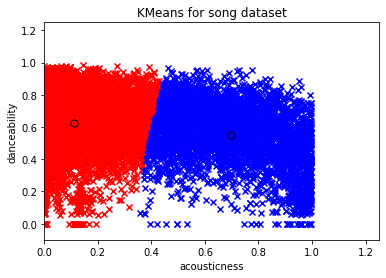

In [279]:
# keep the figures inside the explorer page 
%matplotlib inline


# use 2 features to check the clustering
features2 = ['acousticness', 'danceability']
X = data[features2]

# set the clustering
my_KMeans = KMeans(n_clusters=2)
my_KMeans.fit(X)

# create the labels from the clustering labels 
labels = my_KMeans.labels_

# find the center of clusters
centers = my_KMeans.cluster_centers_

# plot the results
plt.figure

for l, c in zip([0,1,2], ['red', 'blue']):
    
    current_members = (labels == l)
    current_center = centers[l]
    
    plt.scatter(X.iloc[current_members,0], X.iloc[current_members,1], color = c, marker='x')
    
    plt.plot(current_center[0], current_center[1], 'o', markerfacecolor = c,
            markeredgecolor = 'k', markersize=7)

# range of axises
plt.xlim([0, 1.25])
plt.ylim([-0.1, 1.25])

# set the label title and legend
plt.xlabel('acousticness')
plt.ylabel('danceability')
plt.title('KMeans for song dataset')

plt.show

- Here we can see a pattern similiar to that of the feature valence with the feature acousticness. Clustering around low acousticness levels and again at higher levels. This would be helpful to try with each feature in order to find the clustering patterns for each. Of course for our model we already have the labels so we do not need to use this unsupervised learning method, but it does could paint a picture of more helpful features to use.

#### B.) Kmeans Combined Testing and Results

- To test our ideas about acousticness and valence we can use Kmeans again but see if we get some kind of linear pattern that would represent popularity

<function matplotlib.pyplot.show(*args, **kw)>

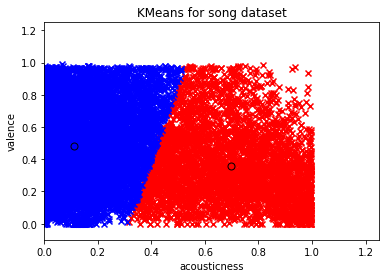

In [280]:
# keep the figures inside the explorer page 
%matplotlib inline


# use 2 features to check the clustering
features2 = ['acousticness', 'valence']
X = data[features2]

# set the clustering
my_KMeans = KMeans(n_clusters=2)
my_KMeans.fit(X)

# create the labels from the clustering labels 
labels = my_KMeans.labels_

# find the center of clusters
centers = my_KMeans.cluster_centers_

# plot the results
plt.figure

for l, c in zip([0,1,2], ['red', 'blue']):
    
    current_members = (labels == l)
    current_center = centers[l]
    
    plt.scatter(X.iloc[current_members,0], X.iloc[current_members,1], color = c, marker='x')
    
    plt.plot(current_center[0], current_center[1], 'o', markerfacecolor = c,
            markeredgecolor = 'k', markersize=7)

# range of axises
plt.xlim([0, 1.25])
plt.ylim([-0.1, 1.25])

# set the label title and legend
plt.xlabel('acousticness')
plt.ylabel('valence')
plt.title('KMeans for song dataset')

plt.show

- Here we do see a much more linear relationship between the two features, indicating a potential label patter for popularity.

-------------------------------------------------------------------------------------------------------------------
## 9.) Conclusion
-------------------------------------------------------------------------------------------------------------------

This accuracy performance test used Spotify's data set to predict the popularity of a song based on the following features: acousticness, danceability, energy, instrumentalness, liveness, speechiness, valence. After having run KNN, Decision Tree, Linear Regression, Logistic Regression, Random Forest, and  K-Means Clustering models  and comparing their accuracies we found that for our given data set the most accurate model is Linear Regression producing an accuracy of 89.91%. Extensive testing can also be done to determine the most efficient model by comparing the computational complexities of the models listed. When dealing with Big Data the complexity of the model, and how the data is trained becomes as important as the accuracy it produces. However, the results indicate that the linear regression model would suffice to predict a song's popularity.

-------------------------------------------------------------------------------------------------------------------
## 10.) Resources
-------------------------------------------------------------------------------------------------------------------

- Data - https://www.kaggle.com/yamaerenay/spotify-dataset-19212020-160k-tracks
- Python Documentation - https://docs.python.org/3/
- ScikitLearn Documentation - https://scikit-learn.org/stable/
- Pandas Documentation - https://pandas.pydata.org/docs/
- Matplot Lib Documentation - https://matplotlib.org/3.3.3/contents.html
- Seaborn Documentation https://seaborn.pydata.org
- CSULA Data Science Lab https://www.calstatela.edu/research/data-science